In [163]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score
from sklearn.metrics import classification_report, confusion_matrix, f1_score, recall_score      
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

import pickle

## Loading the dataset

In [164]:
data = pd.read_csv('survey lung cancer.csv')
data

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES


In [165]:
for col in data.columns:
    print(data[col].value_counts())

GENDER
M    162
F    147
Name: count, dtype: int64
AGE
64    20
63    19
56    19
62    18
60    17
61    16
59    15
70    15
67    13
58    13
69    11
55    11
72    10
71    10
68     9
57     9
77     9
51     8
54     8
65     7
74     6
75     5
76     4
52     4
53     4
73     4
47     4
66     4
49     3
81     2
78     2
44     2
48     2
21     1
79     1
38     1
39     1
87     1
46     1
Name: count, dtype: int64
SMOKING
2    174
1    135
Name: count, dtype: int64
YELLOW_FINGERS
2    176
1    133
Name: count, dtype: int64
ANXIETY
1    155
2    154
Name: count, dtype: int64
PEER_PRESSURE
2    155
1    154
Name: count, dtype: int64
CHRONIC DISEASE
2    156
1    153
Name: count, dtype: int64
FATIGUE 
2    208
1    101
Name: count, dtype: int64
ALLERGY 
2    172
1    137
Name: count, dtype: int64
WHEEZING
2    172
1    137
Name: count, dtype: int64
ALCOHOL CONSUMING
2    172
1    137
Name: count, dtype: int64
COUGHING
2    179
1    130
Name: count, dtype: int64
SHORTNESS OF 

In [166]:
data.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')

In [167]:
encoded_ = ['SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 
           'WHEEZING', 'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH', 'SWALLOWING DIFFICULTY', 'CHEST PAIN']
for feature in encoded_:
    data[feature] = data[feature].replace(1, 0)
    data[feature] = data[feature].replace(2, 1)

In [168]:
data

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,0,1,1,0,0,1,0,1,1,1,1,1,1,YES
1,M,74,1,0,0,0,1,1,1,0,0,0,1,1,1,YES
2,F,59,0,0,0,1,0,1,0,1,0,1,1,0,1,NO
3,M,63,1,1,1,0,0,0,0,0,1,0,0,1,1,NO
4,F,63,0,1,0,0,0,0,0,1,0,1,1,0,0,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,0,0,0,1,1,1,0,0,1,1,1,1,0,YES
305,M,70,1,0,0,0,0,1,1,1,1,1,1,0,1,YES
306,M,58,1,0,0,0,0,0,1,1,1,1,0,0,1,YES
307,M,67,1,0,1,0,0,1,1,0,1,1,1,0,1,YES


<Axes: xlabel='LUNG_CANCER', ylabel='count'>

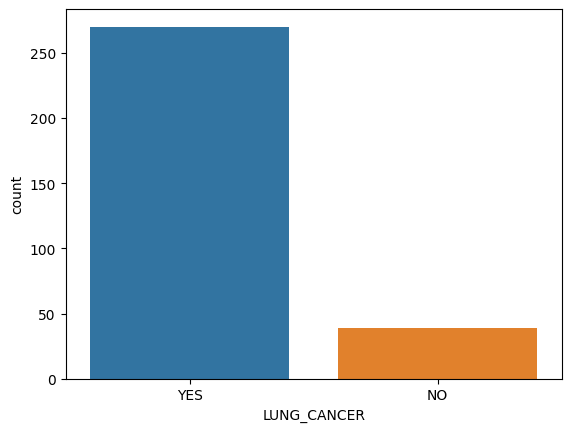

In [169]:
sn.countplot(data = data, x = 'LUNG_CANCER')

In [170]:
data.AGE.describe()

count    309.000000
mean      62.673139
std        8.210301
min       21.000000
25%       57.000000
50%       62.000000
75%       69.000000
max       87.000000
Name: AGE, dtype: float64

In [171]:
data.AGE.unique()

array([69, 74, 59, 63, 75, 52, 51, 68, 53, 61, 72, 60, 58, 48, 57, 44, 64,
       21, 65, 55, 62, 56, 67, 77, 70, 54, 49, 73, 47, 71, 66, 76, 78, 81,
       79, 38, 39, 87, 46], dtype=int64)

In [172]:
# encoding 
le = LabelEncoder()
data['GENDER'] = le.fit_transform(data['GENDER'])
data['LUNG_CANCER'] =le.fit_transform(data['LUNG_CANCER'])
data

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,1,74,1,0,0,0,1,1,1,0,0,0,1,1,1,1
2,0,59,0,0,0,1,0,1,0,1,0,1,1,0,1,0
3,1,63,1,1,1,0,0,0,0,0,1,0,0,1,1,0
4,0,63,0,1,0,0,0,0,0,1,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,0,56,0,0,0,1,1,1,0,0,1,1,1,1,0,1
305,1,70,1,0,0,0,0,1,1,1,1,1,1,0,1,1
306,1,58,1,0,0,0,0,0,1,1,1,1,0,0,1,1
307,1,67,1,0,1,0,0,1,1,0,1,1,1,0,1,1


scaler = MinMaxScaler()
data['AGE'] = scaler.fit_transform(data[['AGE']])

<Axes: >

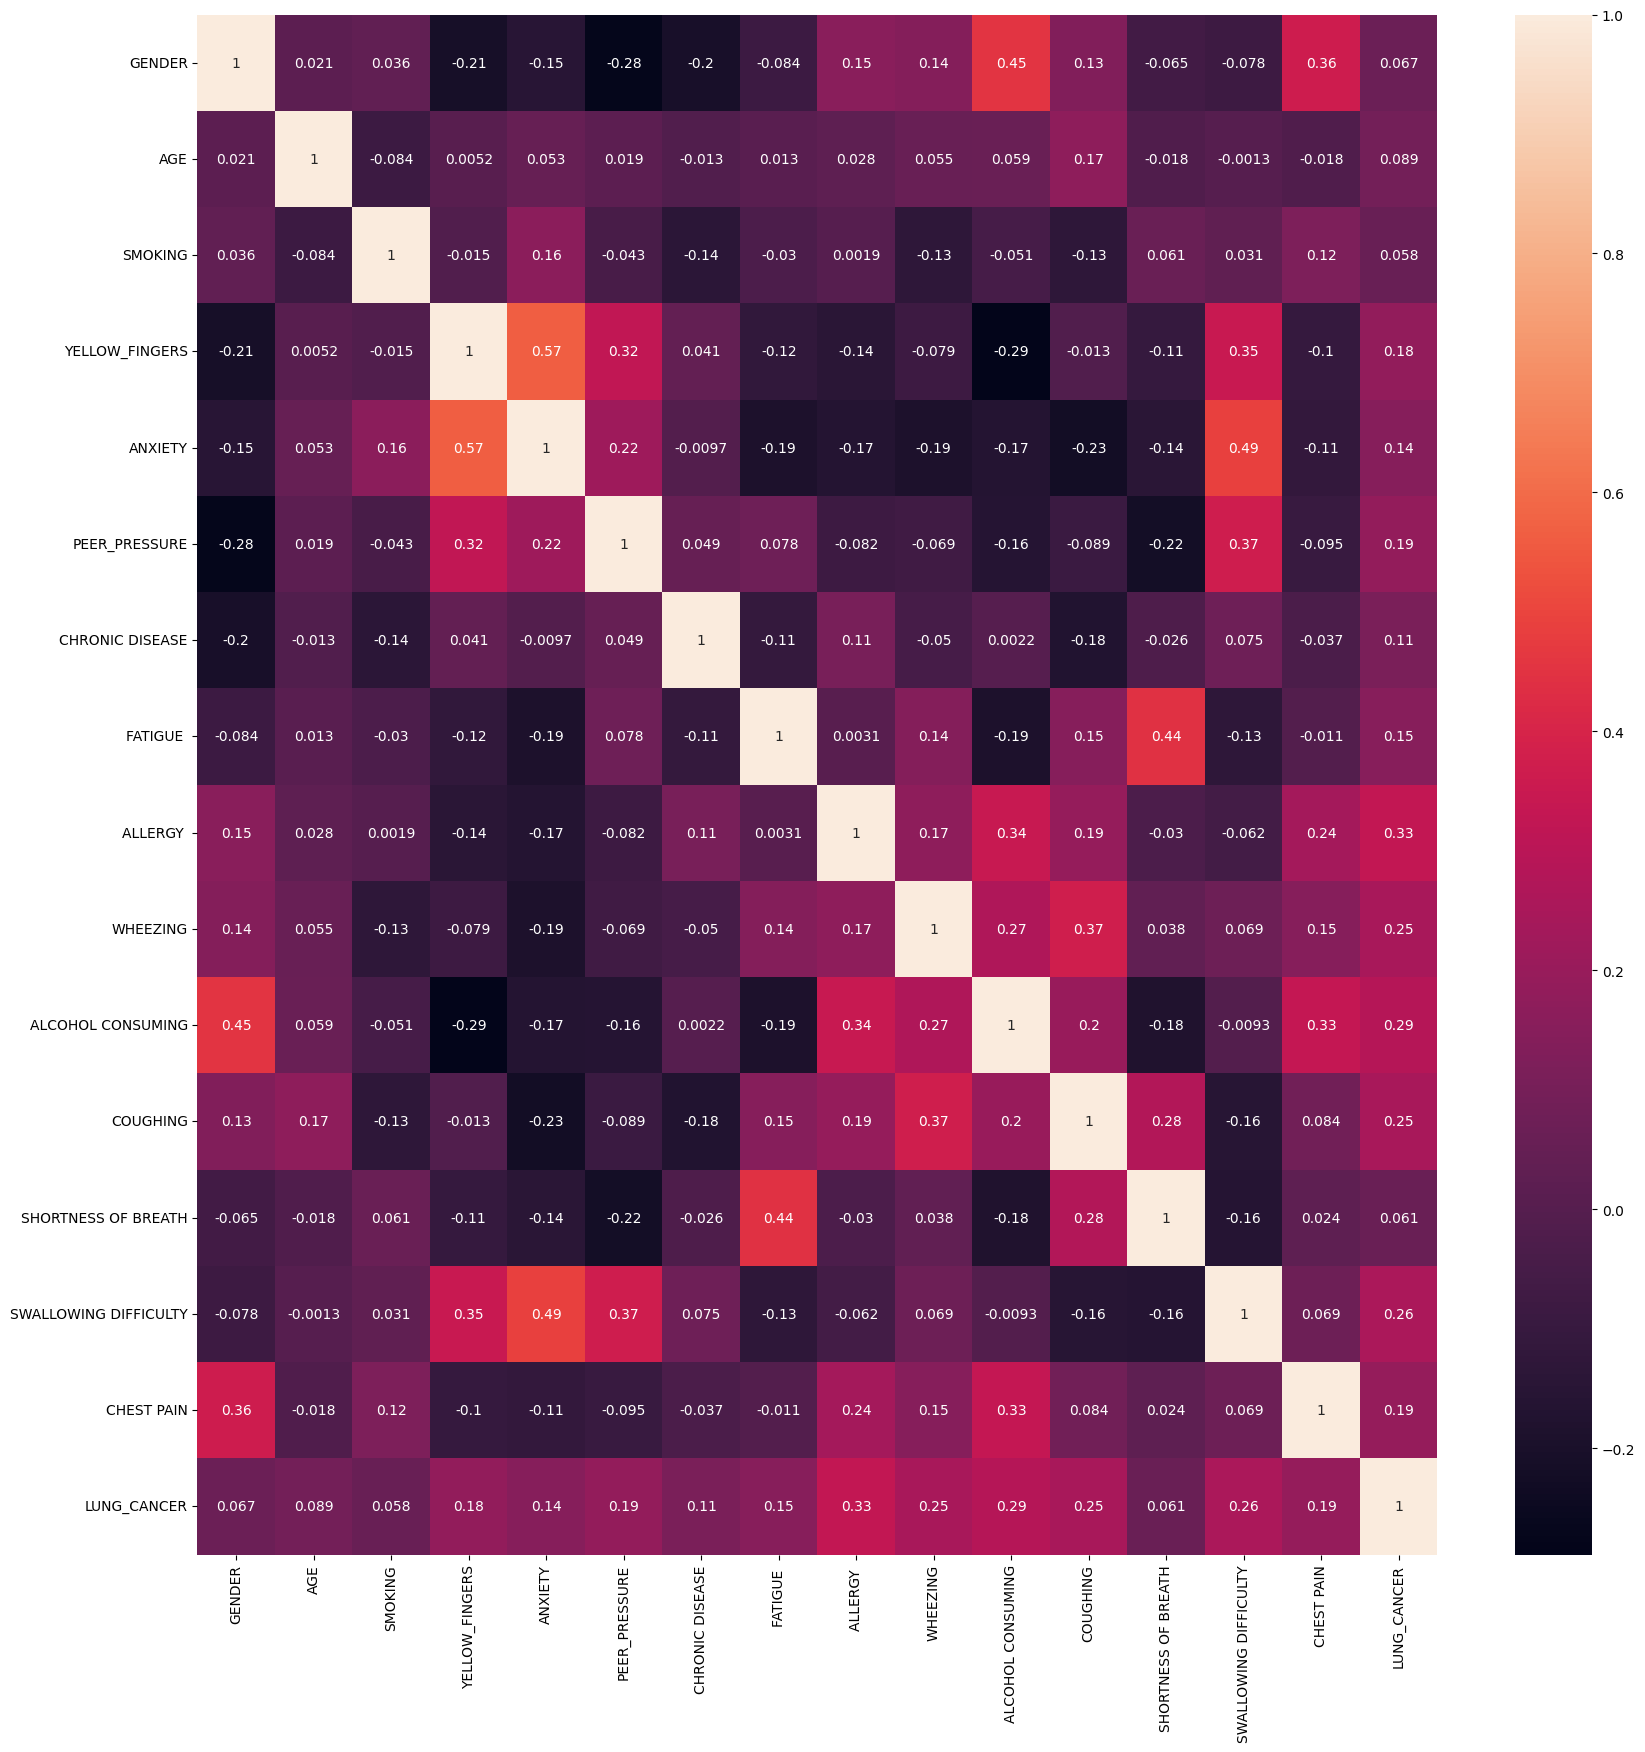

In [173]:
plt.figure(figsize=(20, 20))
sn.heatmap(data.corr(), annot = True)

In [174]:
X = data.drop(['LUNG_CANCER', 'PEER_PRESSURE'], axis = 1)
y = data.LUNG_CANCER

In [175]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= .25)

In [176]:
def training(model, x_data, y_data):
    model.fit(x_data,y_data)
    result = model.predict(X_test)
    
    print(accuracy_score(y_test, result))
    print(precision_score(y_test, result))
    print(recall_score(y_test, result))
    print(f1_score(y_test, result))

    print(confusion_matrix(y_test, result))

    print(classification_report(y_test, result))
    
    return model

In [177]:
lr = training(LogisticRegression(random_state=10), X_train, y_train)

0.9230769230769231
0.92
1.0
0.9583333333333334
[[ 3  6]
 [ 0 69]]
              precision    recall  f1-score   support

           0       1.00      0.33      0.50         9
           1       0.92      1.00      0.96        69

    accuracy                           0.92        78
   macro avg       0.96      0.67      0.73        78
weighted avg       0.93      0.92      0.91        78



C:\Users\Gbanjubola\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [178]:
pickle.dump(lr, open('lr_model', 'wb'))